In [38]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2 #This will give an error if you don't have cv2 module
import os
from scipy.misc import imresize
%matplotlib inline

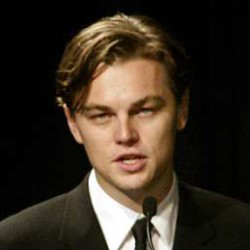

In [70]:
img = Image.open("../data/lfw/Leonardo_DiCaprio/Leonardo_DiCaprio_0001.jpg")
img

(250, 250)


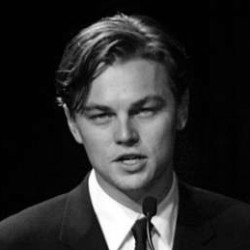

In [72]:
img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
img_gray = Image.fromarray(img_gray)
img_gray

In [73]:
def crop_img_to_size(img, size, output):
    """ Apply crop to image """

    width, height = img.size   # Get dimensions

    left = (width - size)/2
    top = (height - size)/2
    right = (width + size)/2
    bottom = (height + size)/2

    img = img.crop((left, top, right, bottom))
    return img

def apply_gaussian_blur(img, radius):
    """ Apply gaussian blur to an image """
    blur_image = img.filter(ImageFilter.GaussianBlur(radius=radius))
    return blur_image

def pixelate(image, pixel_size):
    image = image.resize(
        (image.size[0] // pixel_size, image.size[1] // pixel_size),
        Image.NEAREST
    )
    image = image.resize(
        (image.size[0] * pixel_size, image.size[1] * pixel_size),
        Image.NEAREST
    )

    return image

In [88]:
crop_img = crop_img_to_size(img_gray, 110, None)
np.max(np.array(crop_img))

255

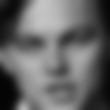

In [82]:
blur_img = apply_gaussian_blur(crop_img, 4)
np.array(blur_img).shape
blur_img

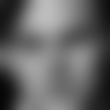

In [83]:
blur_img_8 = apply_gaussian_blur(crop_img, 8)
blur_img_8

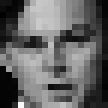

In [76]:
pixelated_img = pixelate(crop_img, 6)
pixelated_img

In [80]:
np.array(pixelated_img).shape

(108, 108)

### Crop all images in Labeled Faces in the Wild Dataset

In [79]:
for subdir, dirs, files in os.walk("../data/lfw/"):
    for file in files:
        image_file_path = os.path.join(subdir, file)
        if image_file_path.endswith(".jpg"):
            img = Image.open(image_file_path)
            crop_img = crop_img_to_size(img, 110, None)
            crop_img.save("../data/preprocessed_lfw/cropped/" + file)

### Apply Gaussian Blur methods to the cropped images

In [99]:
output_dir = "../data/preprocessed_lfw/blurred/"
filters = [4, 6, 8]


for idx, fn in enumerate(os.listdir("../data/preprocessed_lfw/cropped/")):
    
    image_file_path = "../data/preprocessed_lfw/cropped/" + fn
    
    if image_file_path.endswith(".jpg"):
        
        if idx % 1000 == 0:
            print("{0} images processed...".format(idx+1))
        img = Image.open(image_file_path)
        
        for filter_size in filters:
            blurred_image = apply_gaussian_blur(img, filter_size)
            blurred_image.save("../data/preprocessed_lfw/blurred/filter_" + str(filter_size) + "/" + fn)

1001 images processed...
2001 images processed...
3001 images processed...
4001 images processed...
5001 images processed...
6001 images processed...
7001 images processed...
8001 images processed...
9001 images processed...
10001 images processed...
11001 images processed...
12001 images processed...
13001 images processed...


### Apply pixelation to the cropped images

In [100]:
output_dir = "../data/preprocessed_lfw/pixelated/"
sizes = [6,8,12]

for idx, fn in enumerate(os.listdir("../data/preprocessed_lfw/cropped/")):
    
    image_file_path = "../data/preprocessed_lfw/cropped/" + fn
    
    if image_file_path.endswith(".jpg"):
        
        if idx % 1000 == 0:
            print("{0} images processed...".format(idx))
            
        img = Image.open(image_file_path)
        
        for size in sizes:
            pixelated_image = pixelate(img, size)
            pixelated_image.save("../data/preprocessed_lfw/pixelated/size_" + str(size) + "/" + fn)

1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...
10000 images processed...
11000 images processed...
12000 images processed...
13000 images processed...
